In [1]:
%load_ext autoreload
%autoreload 2
%aimport -numpy
%aimport -torch
%aimport -gym

import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
torch.manual_seed(0)

# for saving/loading
import os

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

In [2]:
from Train_policy_func import Policy, Policy_v2, device
from Generate_traj_func import generate_trajectory
from Plot_Functions import plot_suboptimality, plot_trajectory_performance

env_name='CartPole-v0'

In [13]:
from PPO_test_youss import ppo_train
from Train_policy_func import Policy,Policy_v2, device

class Policy_test(nn.Module):
    def __init__(self, state_size=4, action_size=2, hidden_dim=64):
        super().__init__()
        self.actor = nn.Sequential(
            nn.Linear(state_size, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, action_size)
        )
        self.critic = nn.Sequential(
            nn.Linear(state_size, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, state):
        logits = self.actor(state)
        probs = F.softmax(logits, dim=-1)
        value = self.critic(state).squeeze(-1)
        return probs, value
lr_ppo = 0.001

# ── Re-instantiate a fresh policy & optimizer for OPPO ──
env_ppo   = gym.make(env_name)
policy_ppo = Policy_test(state_size=env_ppo.observation_space.shape[0],
                     action_size=env_ppo.action_space.n).to(device)
#policy_oppo.load_state_dict(torch.load("pi_oppo_final.pth"))
opt_ppo    = torch.optim.Adam(policy_ppo.parameters(), lr=lr_ppo)

ppo_train(env_ppo,policy_ppo,opt_ppo,total_updates=300,device=device)


[Update 10] Average reward: 21.54
[Update 20] Average reward: 16.02
[Update 30] Average reward: 10.72
[Update 40] Average reward: 10.34
[Update 50] Average reward: 10.01
[Update 60] Average reward: 11.57
[Update 70] Average reward: 13.79
[Update 80] Average reward: 15.85
[Update 90] Average reward: 16.66
[Update 100] Average reward: 18.28
[Update 110] Average reward: 17.19
[Update 120] Average reward: 18.04
[Update 130] Average reward: 18.96
[Update 140] Average reward: 20.20
[Update 150] Average reward: 17.64
[Update 160] Average reward: 17.11
[Update 170] Average reward: 15.61
[Update 180] Average reward: 16.50
[Update 190] Average reward: 16.68


KeyboardInterrupt: 

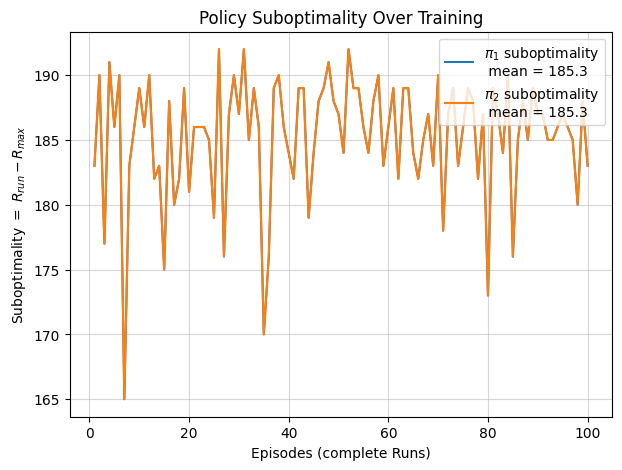

In [8]:
from PPO import ppo_update, RolloutBuffer, evaluate_policy
num_episodes = 100
pi1_mean_reward, pi1_reward = evaluate_policy(policy_ppo, env_ppo, n_episodes=num_episodes)
#pi2_mean_reward, pi2_reward = evaluate_policy(policy_ppo, env_ppo, n_episodes=num_episodes)

plot_suboptimality(
    pi1_reward,
    pi1_reward,
    200,
)  # in cartpole, 200 is the maximum reward

In [14]:
from PPO_test_youss import train_ppo
train_ppo()

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Solved!


[500.0]